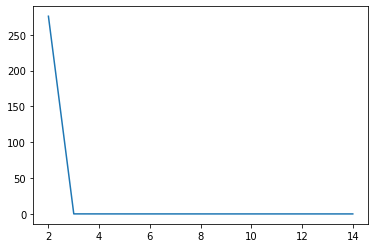

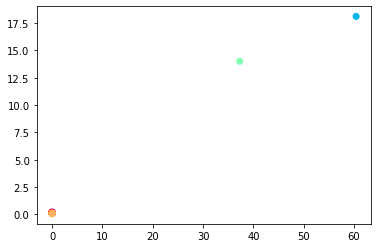

,0,0
0,"(ashoka,)",4
1,"(bajaj,)",3
2,"(bombdyeing,)",0
3,"(century,)",3
4,"(fortis,)",4
5,"(gujalkali,)",3
6,"(idfc,)",3
7,"(ircon,)",3
8,"(itdc,)",4
9,"(jetairways,)",4


In [63]:
import pandas as pd
import glob
import numpy as np
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
path1="C:/Users/aryen/OneDrive/Desktop/Small_Cap"
all_files1=glob.glob(path1 + "/*.csv")
li1=[]
for filename1 in all_files1:
    df1=pd.read_csv(filename1,index_col=None)
    li1.append(df1)
frame1=pd.concat(li1,axis=1) 

data1=pd.DataFrame(frame1['Close Price'])

path2=r"C:\Users\aryen\OneDrive\Desktop\Mid_Cap"
all_files2=glob.glob(path2 + "/*.csv")
li2=[]
for filename2 in all_files2:
    df2=pd.read_csv(filename2,index_col=None)
    li2.append(df2)
frame2=pd.concat(li2,axis=1) 
data2=pd.DataFrame(frame2['Close Price'])
path3=r"C:\Users\aryen\OneDrive\Desktop\Large_Cap"
all_files3=glob.glob(path3+"/*.csv")
li3=[]
for filename3 in all_files3:
    df3=pd.read_csv(filename3,index_col=None)
    li3.append(df3)
frame3=pd.concat(li3,axis=1)
data3=pd.DataFrame(frame3['Close Price'])
lists=[data1,data2,data3]
dataframe=pd.concat(lists,axis=1)
dataframe.dropna()
dataframe.columns=[['ashoka','bajaj','bombdyeing','century','fortis','gujalkali','idfc','ircon','itdc','jetairways','adani','ajantfarm','amarajabat','apollo','bergepaint','castround','cummins','dhfl','excide','gimrin','adanisport','asian','axis','bajfinance','bpcl','cipla','dreddy','eicher','gail','hdfc']]
dataframe

returns=dataframe.pct_change()
mean_return=returns.mean()
return_stdev=returns.std()
annual_returns=mean_return*252
annual_stdev=return_stdev*(252**0.5)

annual_returns.columns=['returns']
annual_stdev.columns=['volatility']

data.columns=[['returns','volatility']]
x1=np.array(annual_returns)
x2=np.array(annual_stdev)

#X=np.array(list(zip(x1,x2))).reshape(len(x1),2)
data=pd.concat([annual_returns,annual_stdev],axis=1)
X=data.values
sse=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(2,15), sse)
plt.show() 


kmeans=KMeans(n_clusters=5).fit(X)
centroids=kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap="rainbow")
plt.show()
company=pd.DataFrame(data.index)
cluster_labels=pd.DataFrame(kmeans.labels_)
df=pd.concat([company,cluster_labels],axis=1)
df